In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [50]:
import numpy as np

In [63]:
import seaborn as sns
%matplotlib inline

In [24]:
tweets = pd.read_csv('vfarms.csv')

In [25]:
tweets

id      conversation_id     created_at        date  \
0     1260879852917440512  1260879852917440512  1589452157000  2020-05-14   
1     1260878483799961602  1260692294870732800  1589451831000  2020-05-14   
2     1260868773202071554  1260839178432020480  1589449515000  2020-05-14   
3     1260829270907158529  1260829270907158529  1589440097000  2020-05-14   
4     1260805936748408833  1255254212243525635  1589434534000  2020-05-14   
...                   ...                  ...            ...         ...   
7178  1132449739071401984  1132449739071401984  1558832032000  2019-05-25   
7179  1132416383151616000  1132416383151616000  1558824079000  2019-05-25   
7180  1132367187614814209  1132367187614814209  1558812350000  2019-05-25   
7181  1132349963529146368  1132346515022860292  1558808244000  2019-05-25   
7182  1132311639896809473  1132311639896809473  1558799106000  2019-05-25   

          time timezone              user_id        username  \
0     06:29:17      EDT  1126761840678178816  sixteenthvenus   
1     06:23:51      EDT   875727134089785351      toddcitron   
2     05:45:15      EDT           2561944748   defectinggrey   
3     03:08:17      EDT   821748775127552001     ganja_seeds   
4     01:35:34      EDT  1027244220128608256       morty_lin   
...        ...      ...                  ...             ...   
7178  20:53:52      EDT   892476305416962048        nodak541   
7179  18:41:19      EDT             34152439        honnonji   
7180  15:25:50      EDT            465212150    art_ticulate   
7181  14:17:24      EDT  1001914360774647808   tomthetrader1   
7182  11:45:06      EDT   866760701053947904       beep_bot1   

                           name place  \
0                             Ø   NaN   
1              Todd Alan Citron   NaN   
2           AmbrosiaCreamChapel   NaN   
3     #Cannabis seeds worldwide   NaN   
4                       M Æ R-3   NaN   
...                         ...   ...   
7178        NoDak Green Prairie   NaN   
7179                  ꦲꦱ꧀ꦭꦶꦥꦤꦫꦒ   NaN   
7180                      Sarah   NaN   
7181                   tom 🧙‍♂️   NaN   
7182                    beepbot   NaN   

                                                  tweet           mentions  \
0     “i only have ugly pennies”\n“show me your ant ...                 []   
1     No indoor plumbing yet?  Sounds like my Momma’...    ['shaniatwain']   
2     “But...”, someone shouts. “... indoor farms!” ...     ['botanygeek']   
3     Learn how to grow weed >>  http://www.howtogro...                 []   
4     For me it's partly due to having more time to ...  ['magdalenakala']   
...                                                 ...                ...   
7178  **Lemon Kush** Indoor grown by Fern Ridge Farm...                 []   
7179  How this indoor hydroponic farm is improving f...                 []   
7180  My work friend invited me to her family's farm...                 []   
7181  Michael- hard question because I’m uncertain h...       ['46rienzo']   
7182  Ng just launched our brand new Get ready for t...                 []   

                                                   urls photos  replies_count  \
0                                                    []     []              0   
1                                                    []     []              0   
2                                                    []     []              0   
3     ['http://www.howtogrowweed420.com/3103.html', ...     []              0   
4                                                    []     []              0   
...                                                 ...    ...            ...   
7178                                                 []     []              0   
7179                                                 []     []              0   
7180                                                 []     []              1   
7181                                                 []     []              1   
7182    

In [26]:
tweets['date'] = pd.to_datetime(tweets['date'])

In [27]:
tweets.set_index('date', inplace=True)

In [43]:
just_tweets = tweets[['tweet']]

In [44]:
just_tweets

tweet
date                                                         
2020-05-14  “i only have ugly pennies”\n“show me your ant ...
2020-05-14  No indoor plumbing yet?  Sounds like my Momma’...
2020-05-14  “But...”, someone shouts. “... indoor farms!” ...
2020-05-14  Learn how to grow weed >>  http://www.howtogro...
2020-05-14  For me it's partly due to having more time to ...
...                                                       ...
2019-05-25  **Lemon Kush** Indoor grown by Fern Ridge Farm...
2019-05-25  How this indoor hydroponic farm is improving f...
2019-05-25  My work friend invited me to her family's farm...
2019-05-25  Michael- hard question because I’m uncertain h...
2019-05-25  Ng just launched our brand new Get ready for t...

[7183 rows x 1 columns]

In [45]:
analyzer = SentimentIntensityAnalyzer()
for tweet in just_tweets['tweet']:
    vs = analyzer.polarity_scores(tweet)
    print("{:-<65} {}".format(tweet, str(vs)))

“i only have ugly pennies”
“show me your ant farm!”
“i’m losing my indoor mind” {'neg': 0.323, 'neu': 0.677, 'pos': 0.0, 'compound': -0.7345}
No indoor plumbing yet?  Sounds like my Momma’s farm. Cute picture Shania!  Blessings to You, Frédéric and Eja. God Bless You from Carlsbad Beach (San Diego), CA. {'neg': 0.059, 'neu': 0.562, 'pos': 0.38, 'compound': 0.8999}
“But...”, someone shouts. “... indoor farms!” [Shows cute photo of trays of cress/garnish] {'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.5093}
Learn how to grow weed >>  http://www.howtogrowweed420.com/3103.html  || Super High: Roseville Electric leads police to indoor Weed Farm - Rocklin & Roseville Today  https://www.rosevilletoday.com/news/roseville/indoor-marijuana-farm-bust/ … {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.5994}
For me it's partly due to having more time to research stuff to buy/browse / Feels more productive than watching Netflix / time for discovering new things E.g. I never thought I'd 

When I was young we had no indoor plumbing.  It was a different world then, no TV only a radio and lots of hard farm work.  Trips to the book mobile on Tuesday and free time reading about an exciting world we would wish to be part of, it's amazing how the times can change. {'neg': 0.087, 'neu': 0.719, 'pos': 0.195, 'compound': 0.8481}
Extending the number of towers for the base water return loop of the indoor hydroponic vertical farm. Each row is 7 inches apart and each tower is 6 feet tall and holds 6 pods for easy access. Materials include 2…  https://www.instagram.com/p/B-4hfuRnFsh/?igshid=1j3ztxylla7lo … {'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.4939}
A Jeff Bezos-backed warehouse farm startup is building 300 indoor farms across China  https://www.businessinsider.com/vertical-farming-company-jeff-bezos-plenty-china-2018-1?utmSource=twitter&utmContent=referral&utmTerm=topbar&referrer=twitter … via @businessinsider {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Pr

what if this is some kind of movie and it starts out with a one month lockdown then 10 years later everyone has indoor farms and livestock {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Hemp farm plans indoor growing operation in Milwaukee's Riverwest neighborhood  https://buff.ly/3aA0Lsu  #Wisconsin #hemp #Sustainability #votehemp #farmers pic.twitter.com/wxj9IZlj39 {'neg': 0.0, 'neu': 0.904, 'pos': 0.096, 'compound': 0.1779}
Indoor Farm – Virily  https://tgouard.wordpress.com/2020/03/19/indoor-farm-virily-4/ … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Indoor Farm  https://virily.com/food-drink/indoor-farm/ …-------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
So if this person has plants (could be veggies or herbs) inside their house... indoor farm? 🤔 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Only fans is just an indoor wind farm---------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I put more and more stock in my g

indoor hydroponic farming is a clean way to farm. stop subsidizing the old ways... let the market direct farming to a new better system. Or, ban all Monsanto products. @WhiteHouse {'neg': 0.155, 'neu': 0.695, 'pos': 0.15, 'compound': -0.0516}
THIS WEEK visit the Largest Indoor Farm Show in Eastern Canada! The #LdnFarmShow presented by @FCCagriculture showcases the latest in #agritechnology & #agequipment with 370+ exhibitors, new products & services, educational seminars & more. Details:  http://bit.ly/ldnfarmshow  pic.twitter.com/FmWr9yQJnm {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Turbines are noisy- not "clean". "..audible indoor amplitude modulation still occurred for 16% of the time at a distance of 3.5 km. At night-time, audible amplitude modulation occurred indoors as far as 3.5 km from the wind farm for up to 22% of the time."  http://www.digitaljournal.com/pr/4607882  {'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.4512}
Join us this week on March 4-6 for t

Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&user_referrer=466108&user_referral_channel=twitter&product=666 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/windowsill-lavender-planter?social=twitter&user_referrer=438515&user_referral_channel=twitter&product=662 … {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6825}
Farm-to-table produce doesn’t get any fresher with @backtotheroots indoor gardening kit! Get it for FREE too with @socialnature to try and review! #trynatural  https://www.socialnature.com/microgreens-grow-kit-rainbow?social=twitter&user_referrer=123506&user_referral_channel=twitter

The countdown begins until the National Farm Machinery Show. The nation's largest indoor farm machinery show happens next week in Louisville, KY! 🚜 @KYNFMS #NFMS20 #WeAreAGI #AgTwitter pic.twitter.com/C9kou9AZxi {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
From tank to table: How an indoor fish farm gives Lexington chefs a tasty, unique edge  http://dlvr.it/RPQfRx  pic.twitter.com/Sz1dXtp3eC {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
A look inside the "world's largest indoor farm"  https://buff.ly/381kz79  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Grow and behold. Build an indoor herb garden, with 
@SM_Farms tomorrow at Storey Club and learn how it can benefit both you and your home. Part of The Sessions at Paddington Central.  http://ow.ly/lPK050y4hEZ 
#PaddingtonCentral #SquareMileFarms pic.twitter.com/Q2FUGPybfE {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'compound': 0.4588}
Today our team welcomes you at the Fruit Logisitica in Berlin. We will inform yo

I really dislike how online videos are normalizing adopting wild animals as indoor pets, or farm animals as indoor pets. These animals have very specific needs. Trying to keep that in mind when I see otherwise "cute" videos of goats kept in kitchen rabbit pens and the likes. {'neg': 0.054, 'neu': 0.838, 'pos': 0.108, 'compound': 0.4417}
Exactly why I have positioned myself thusly. I will be the Grandma Educator, and my Farm will be our Outdoor school. We can do Indoor school in the Solarium. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
We're so excited to be @farmshelf's educational partner! Imagine your own smart indoor farm in your school, powering your cafeteria — and student learning about the plant lifecycle, agriculture, nutrition, and more!  https://hubs.ly/H0mvJ0X0  #edtech #farmshelf #STEM #STEAM pic.twitter.com/RPNDi0YvA2 {'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.7164}
Who's ready for the largest indoor farm show in Canada?!? #agdays20 kicks off this mon

Urban Indoor Farms can grow Vegetables, Fruits, Rice etc & Sustain food all through the year without the Need for too Much Water & Soil & Without Worrying About Droughts & Floods.. {'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.2584}
#Raining again ☔️ so getting on with some indoor jobs in the dry of the #polytunnel. 
.
.
#beekeeping #beekeeper #bees #smallholder #smallholding #winter #growyourown #apiculture #farminguk pic.twitter.com/W6OWcuWTvu {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Who's ready for the largest indoor farm show in Canada?!? #agdays20 kicks off this month with a fantastic line-up of guest speakers and exhibitors from around the world. 
Check out  https://hubs.ly/H0mpScT0  for details and see you in #Brandon #Manitoba
 https://hubs.ly/H0mpKZB0  pic.twitter.com/vcZIkeMADk {'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'compound': 0.7752}
Happy #NewYear! Maymont Mansion, Nature & Visitor Center, and other indoor exhibits will be closed today. Our grounds,

heisha's automatic drone charging pad for drone charging station internet has been produced the fifth batch delivery. Make the automatic inspection, farm survey, Infrastructure Management, Disaster-Relief,  Outdoor-Indoor Navigation, exploration of hazardous area possible.  pic.twitter.com/HncTAS0nAu {'neg': 0.0, 'neu': 0.946, 'pos': 0.054, 'compound': 0.2263}
JOYPLUS Welcome Harvest Fall Sunflowers & Pumpkin Garden Flag – Vertical Double Sided Autumn Decorative Rustic/Farm House Small Decor Flags Set for Indoor & Outdoor Decoration, 12 X 18 Inch  https://outdoorysk.com/joyplus-welcome-harvest-fall-sunflowers-pumpkin-garden-flag-vertical-double-sided-autumn-decorative-rustic-farm-house-small-decor-flags-set-for-indoor-outdoor-decoration-12-x-18-inch-2/ … pic.twitter.com/lBe6unOVk1 {'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4588}
Old Sad would make a great place for high end retail and something like in Philly the Reading Terminal Market.. Since we are a farm to fork city ..

There are a lot of indoor farms in the area---------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Indoor farming without the use of soil offers a number of benefits over traditional, outdoor farms: higher crop densities and yields, many more harvests per...  https://www.growx.io/blog/2017/2/9/indoor-vs-outdoor-why-medicinal-plants-should-be-grown-in-a-sterile-environment … {'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4404}
Happy Farmer's Market Saturday. We are here and at Worthington Indoor farmer's market until noon today.  pic.twitter.com/Ud2NlLMjea – at Clintonville Farmers' Market {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.5719}
There are many advantages to urban indoor farming. The land requirement is quite low, water consumption is 80-95 percent less, the water is recycled and saved, it is pesticide-free and in cases of high-tech farms there is no real dependency on the weather.. {'neg': 0.094, 'neu': 0.798, 'pos': 0.108, 'compound': 0.1

My butcher sources meat within 15 miles of his shop. I can ask which farm supplied my pork for my sausages and bacon. I guess if you want to buy mass, indoor reared pork from Denmark there may be shortages. I always buy British. {'neg': 0.036, 'neu': 0.935, 'pos': 0.029, 'compound': -0.0772}
#Edinburgh-based vertical farm specialist, Shockingly Fresh seeks #investment to grow 40 indoor sites...  https://bit.ly/2Mi1sfu  {'neg': 0.106, 'neu': 0.75, 'pos': 0.144, 'compound': 0.1531}
We're excited to announce that Adam Waterman from @LettUsGrow will be speaking at #Btechshowcase! LettUs Grow uses aeroponic technology to deliver consistent, rapid yields for indoor farms. Simple, efficient & sustainable. Register for your ticket now >  http://bit.ly/btsnov19  pic.twitter.com/axZLKuAuzj {'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.6696}
It's @UKSausageWeek 🐷 The @UniversityLeeds have state of the art facilities for studies into #nutrition #behaviour & #welfare of #pigs which allow u

State Farm arena go feel like Cameron indoor stadium tomm night whn the pelicans play the hawks. So many duke players gonna be on the floor. U kno I’m in there like swimwear jack {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.7506}
Get racing on our new multi-level indoor race track at Eagle Farm! #slideways #gokarting #brisbane #GoldCoast  http://bit.ly/2smtijC  pic.twitter.com/MmXo52wbyY {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Uppergate Farm sleeps 2-10 guests across 4 cottages, situated in the heart of the Holme Valley in Yorkshire. Complete with an indoor pool, sauna and steam room, a private garden for each cottage, as well as an award-winning, walkable pub. Find out more:  http://premiercottages.co.uk/cottages/uppergate-farm/ … pic.twitter.com/8pG5VEcdLk {'neg': 0.0, 'neu': 0.955, 'pos': 0.045, 'compound': 0.2732}
Indoor Pumpkin Farm. Take your pick! 🎃  https://ift.tt/323z0nW  pic.twitter.com/jh2GrSwjd3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
T

#RT @RollingStone: Between energy-intensive indoor grows and the mountain of plastic packaging, legal weed is not as green as you would think. But some producers — like California’s Aster Farms — are leading the way to sustainability …  pic.twitter.com/hoz3fqKnEj {'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'compound': 0.5423}
Ikea holdings Ingka Group, GV, Bezos are all investing  in vertical farms and Singapore Airline meals will benefit from the pesticide  free a vegetables. Ocado and M&S all have varying interests in indoor farming  https://www.ft.com/content/cac48190-9d8a-11e9-9c06-a4640c9feebb … {'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.8074}
You ain't seen nothin yet. Wait till you see the Fencing, House I build and then my fully Automated Indoor Farm. 

The point is to make people jealous 👍👍 this world won't take my skills serious? That's fine, I'll show the world. Then they will want what they can't have 😈😈 {'neg': 0.1, 'neu': 0.81, 'pos': 0.09, 'compound': -0.1729}
T

Visit to Shepherd's Place Farm to feed the animals and play in the indoor play area. Then to Sunnybank Gardens for Ice Cream and Crazy Golf @RedscopeSchool #summerchallengesnearlycomplete pic.twitter.com/RhMew58Z8A {'neg': 0.072, 'neu': 0.783, 'pos': 0.145, 'compound': 0.34}
#SteelMaster’s prefabricated #quonsethuts are the perfect buildings to accommodate your indoor farm and keep your valuable growing equipment safe!  https://qoo.ly/zcphj  {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.8932}
This luxury Cotswold home only has the carbon footprint of a two-bed flat due to innovative eco ideas.

Barnsley Hill Farm, a converted 17th century barn, has an indoor solar park, underground heat storage, a sewage…  https://www.instagram.com/p/B1iy1WCHORY/?igshid=1onut2o3sttd … {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.4404}
US: West Chicago - FOR SALE or RENT: Turn Key Vertical Hydroponic Indoor Urban Farm  https://www.igrow.news/igrownews/us-west-chicago-for-sale-or-rent-

VIDEO | Turning convicts into 'compassionate capitalists': Wilmington's 1st indoor farm to grow 365 days  https://www.wdel.com/news/video-turning-convicts-into-compassionate-capitalists-wilmington-s-st-indoor/article_03590518-a8ca-11e9-9996-dbf309867279.html?utm_medium=social&utm_source=twitter&utm_campaign=user-share … via @WDEL {'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.4939}
Sooo -- what's the standard uniform at an indoor shrimp farm?  (What an awesomely cool biz to run!)

#BizapaloozaChat {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3802}
Author Correction: Farm-like indoor microbiota in non-farm homes protects children from asthma development.  https://www.ncbi.nlm.nih.gov/pubmed/31316162?dopt=Abstract … via @circleboom {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3182}
G3 Carbine Club Stakes winner Lunar Rise fourth Tbred Sport Horse 90cm class at Tamworth Winter Indoor Championships. Bred by Arrowfield , sold at Inglis Easter bought by DGR, retra

🌱 Applications now OPEN for the Next-Gen Farmer Training Program at @squarerootsgrow's new Michigan indoor farm, opening this fall. Read all about it here 👉  https://squarerootsgrow.com/2019/06/24/Our-Next-Gen-Farmer-Training-Program-is-Empowering-Michigan-s-Future-Farmers.html … pic.twitter.com/J1aHlB4vBO {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The automated turn-key indoor farm we can operate for you @80acresfarms #agsolutions #collaborate #infiniteacres {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Anyone guess what #seeds we are #sprouting? 
🌱🥒🌿
.
.
.
#stlfarm #verticalfarm #cityfarm #eatlocal #urbanfarm #localfarm #growfood #yearround #localfood #indoorfarm #hydroponics #stleats #stlfood #stl #city #farm…  https://www.instagram.com/p/BzGiZojDfPA/?igshid=1bqmbim5uau7p … {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Every year massive crops are being decimated by climate change. Farmers crops have been getting smaller and smaller. They can’t compete wit

The farm is totally flooded. It just dried up from the last storm. Our indoor arena looks like a fishing pond. The outdoor arenas look like lakes. Oh this is gonna be fun in the morning. I'm not a happy farmer now. Fyi, all the horses are great. They're all in their sheds. 😁 {'neg': 0.042, 'neu': 0.716, 'pos': 0.242, 'compound': 0.9217}
Fun Fact: When climate change has destroyed the viability of traditional farms through drought much of our food will come from indoor laboratories and 3-D printing food factories. {'neg': 0.098, 'neu': 0.8, 'pos': 0.102, 'compound': 0.0258}
I live out in the countryside and if I told people my cats where indoor cats they would laugh at me and call it animal cruelty. Cats are predators. They're farm-animals that hunt mice and rats. {'neg': 0.094, 'neu': 0.819, 'pos': 0.087, 'compound': -0.0772}
First Fully Automated Indoor Farm Being Built In Ohio  https://hubs.ly/H0j604K0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Almost the same here.  Poor

Not very pleased with how that worked out. Not really sure how it worked. Need to look into how to refine this thing.

In [46]:
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in just_tweets['tweet']]

(array([  39.,   38.,   43.,  114.,   76.,   96.,  118.,  126.,   95.,
        2124.,  106.,  424.,  409.,  496.,  495.,  412.,  657.,  513.,
         508.,  294.]),
 array([-0.9691 , -0.87134, -0.77358, -0.67582, -0.57806, -0.4803 ,
        -0.38254, -0.28478, -0.18702, -0.08926,  0.0085 ,  0.10626,
         0.20402,  0.30178,  0.39954,  0.4973 ,  0.59506,  0.69282,
         0.79058,  0.88834,  0.9861 ]),
 <a list of 20 Patch objects>)

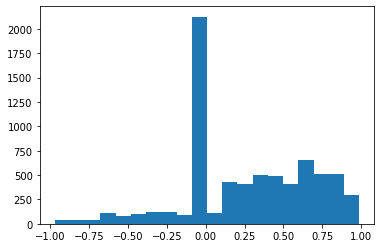

In [47]:
plt.hist(scores, bins=20)

My original hypothesis was that people who are talking about indoor farming were excited about it, with very few being against it. It is a niche. Not much reason to talk about it if you're not enthusiastic about it.

In [48]:
just_tweets['tweet'].str.contains('vertical farm', regex=False).value_counts()

False    6581
True      602
Name: tweet, dtype: int64

In [49]:
just_tweets['sentiment'] = scores

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
just_tweets['sentiment'] = just_tweets['sentiment'].map({'01': 'winter', '02': 'winter', '12': 'winter', 
                                         '03': 'spring', '04': 'spring', '05': 'spring',
                                         '06': 'summer', '07': 'summer', '08': 'summer',
                                         '09': 'fall', '10': 'fall', '11': 'fall'})

tweet  sentiment
date                                                                    
2020-05-14  “i only have ugly pennies”\n“show me your ant ...    -0.7345
2020-05-14  No indoor plumbing yet?  Sounds like my Momma’...     0.8999
2020-05-14  “But...”, someone shouts. “... indoor farms!” ...     0.5093
2020-05-14  Learn how to grow weed >>  http://www.howtogro...     0.5994
2020-05-14  For me it's partly due to having more time to ...     0.0000
...                                                       ...        ...
2019-05-25  **Lemon Kush** Indoor grown by Fern Ridge Farm...     0.7170
2019-05-25  How this indoor hydroponic farm is improving f...     0.4215
2019-05-25  My work friend invited me to her family's farm...     0.8289
2019-05-25  Michael- hard question because I’m uncertain h...    -0.0516
2019-05-25  Ng just launched our brand new Get ready for t...     0.4588

[7183 rows x 2 columns]

positive sentiment: compound score >= 0.05  

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)  

negative sentiment: compound score <= -0.05  
  
https://github.com/cjhutto/vaderSentiment#about-the-scoring

In [54]:
just_tweets.drop(columns=['score'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
just_tweets['score'] = pd.cut(just_tweets.sentiment,bins=[-1,-0.051,0.049,1],labels=['negative','neutral','positive'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
just_tweets

tweet  sentiment  \
date                                                                       
2020-05-14  “i only have ugly pennies”\n“show me your ant ...    -0.7345   
2020-05-14  No indoor plumbing yet?  Sounds like my Momma’...     0.8999   
2020-05-14  “But...”, someone shouts. “... indoor farms!” ...     0.5093   
2020-05-14  Learn how to grow weed >>  http://www.howtogro...     0.5994   
2020-05-14  For me it's partly due to having more time to ...     0.0000   
...                                                       ...        ...   
2019-05-25  **Lemon Kush** Indoor grown by Fern Ridge Farm...     0.7170   
2019-05-25  How this indoor hydroponic farm is improving f...     0.4215   
2019-05-25  My work friend invited me to her family's farm...     0.8289   
2019-05-25  Michael- hard question because I’m uncertain h...    -0.0516   
2019-05-25  Ng just launched our brand new Get ready for t...     0.4588   

               score  
date                  
2020-05-14  negative  
2020-05-14  positive  
2020-05-14  positive  
2020-05-14  positive  
2020-05-14   neutral  
...              ...  
2019-05-25  positive  
2019-05-25  positive  
2019-05-25  positive  
2019-05-25  negative  
2019-05-25  positive  

[7183 rows x 3 columns]

In [61]:
%run -i 'mod5_functions.py'

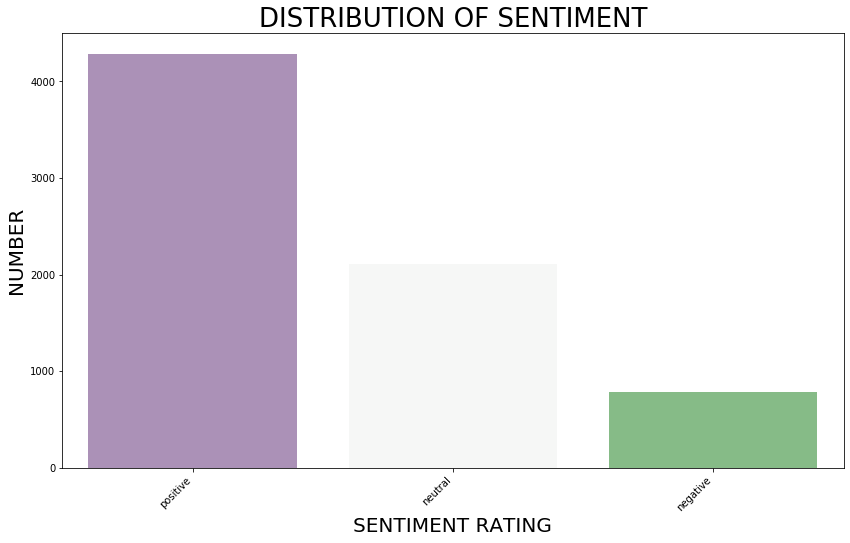

In [64]:
make_value_chart(just_tweets, 'score', 'SENTIMENT RATING', 'NUMBER', 'DISTRIBUTION OF SENTIMENT')

Can run statistical tests to confirm the amounts are statistically significantly different.